<a href="https://colab.research.google.com/github/sairtnapavan/Brain-wave-matrix-solutions/blob/main/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Summary Metrics
Total Revenue: ₹487,729
Total Transactions: 1000
Average Daily Basket: ₹5419.21

📦 Revenue by Category:
Category
Others             126479
Groceries          125387
Home Essentials    121236
Personal Care      114627
Name: Revenue, dtype: int64

🔥 Top 5 Products:
Product
Notebook     44299
Battery      41666
Pen          40514
Dishwash     33212
Detergent    31475
Name: Revenue, dtype: int64


<ipython-input-1-cc2623a76a06>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


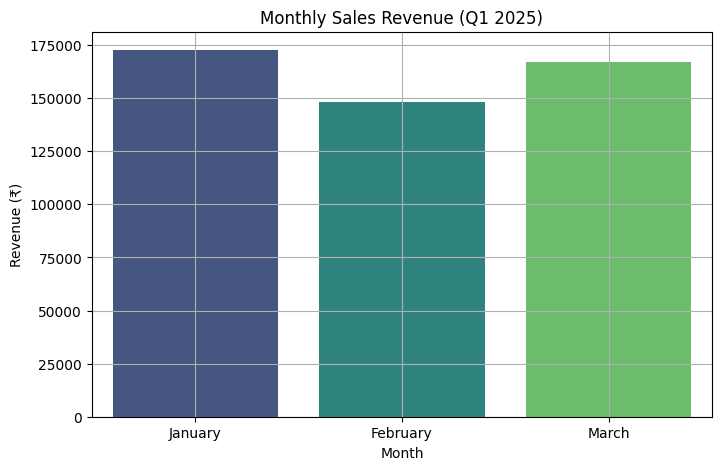

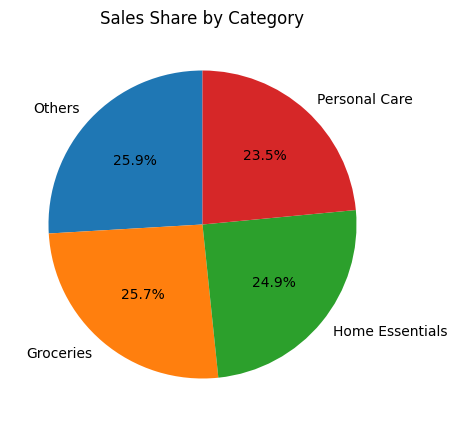

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

# Step 1: Generate Sample Sales Data
categories = ['Groceries', 'Personal Care', 'Home Essentials', 'Others']
products = {
    'Groceries': ['Rice', 'Wheat', 'Sugar', 'Oil', 'Salt'],
    'Personal Care': ['Toothpaste', 'Shampoo', 'Face Cream', 'Soap'],
    'Home Essentials': ['Dishwash', 'Floor Cleaner', 'Detergent', 'Air Freshener'],
    'Others': ['Battery', 'Pen', 'Notebook']
}

def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

data = []
start_date = datetime(2025, 1, 1)
end_date = datetime(2025, 3, 31)

for _ in range(1000):
    category = random.choice(categories)
    product = random.choice(products[category])
    quantity = random.randint(1, 5)
    price = random.randint(20, 300)
    date = random_date(start_date, end_date)
    data.append([date, category, product, quantity, price * quantity])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Category', 'Product', 'Quantity', 'Revenue'])
df['Month'] = df['Date'].dt.strftime('%B')

total_revenue = df['Revenue'].sum()
total_transactions = len(df)
average_basket = df.groupby('Date')['Revenue'].sum().mean()

print("📊 Summary Metrics")
print(f"Total Revenue: ₹{total_revenue:,.0f}")
print(f"Total Transactions: {total_transactions}")
print(f"Average Daily Basket: ₹{average_basket:.2f}\n")

category_sales = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
print("📦 Revenue by Category:")
print(category_sales)

top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
print("\n🔥 Top 5 Products:")
print(top_products)

monthly_sales = df.groupby('Month')['Revenue'].sum().reindex(['January', 'February', 'March'])

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Monthly Sales Revenue (Q1 2025)')
plt.ylabel('Revenue (₹)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Share by Category')
plt.ylabel('')
plt.show()
